In [1]:
#导入数据
import pandas as pd
import numpy as np

image=pd.read_excel('D:/2021 MCM/File/2021MCM_ProblemC_ Images_by_GlobalID.xlsx',encoding='ISO-8859-1', sep='\t',header=0)
dataset=pd.read_excel('D:/2021 MCM/File/2021MCMProblemC_DataSet.xlsx',encoding='ISO-8859-1', sep='\t',header=0)
temp=pd.read_excel('D:/2021 MCM/File/temp.xlsx',encoding='ISO-8859-1',index_col=0, sep='\t',header=0)
temp2=pd.read_excel('D:/2021 MCM/File/temp2.xlsx',encoding='ISO-8859-1',index_col=0, sep='\t',header=0)
#删除冗余列
dataset=dataset.drop(columns=['Lab Comments','Submission Date'])
temp2=temp2.drop(columns=['LabStatus','Notes'])
#保留正确格式图片
image=image[image.FileType.isin(['image/jpg','image/png'])]
image=pd.merge(temp,image,on='FileName',how='outer')
#合并
comp=pd.merge(dataset,image,on='GlobalID',how='outer')
comp=comp.drop(columns=['FileType'])

#加入x1填充缺失值
comp.loc[(comp.LabStatus == 'Positive ID') ,'X1'] =1
comp.loc[(comp.LabStatus == 'Negative ID') ,'X1'] =0
comp['X1']=comp['X1'].fillna(0)
comp['FileName']=comp['FileName'].fillna('Nothing')
comp['Notes']=comp['Notes'].fillna('Nothing')
#清洗
comp=comp.drop_duplicates(['GlobalID'],keep='last')
comp.dropna(subset=['GlobalID'],inplace=True)


In [2]:
#加入X2
comp=pd.merge(comp,temp2,on='GlobalID')
comp=comp.drop_duplicates(['GlobalID'],keep='last')
comp.dropna(subset=['GlobalID'],inplace=True)
np.random.seed(1)
def sw(x):
    return x+np.random.random_sample()*0.2
comp['X2']=comp['X2'].map(sw)


In [3]:
#加入X3
lat0=comp['Latitude']
lon0=comp['Longitude']

lat=[]
lon=[]
'''
#匹配纬度
def f1(x):
    if 44<=x<46:
        lat.append(1)
    if 46<=x<48:
        lat.append(2)
    else:
        lat.append(3)
        

#匹配经度
def f2(y):
    if -125<=y<-122:
        lon.append(1)
    if -122<=y<-119:
        lon.append(2)
    else:
        lon.append(3)

comp['Latitude'].map(f1)
comp['Longitude'].map(f2)
'''
#匹配纬度
for x in lat0:
    if 44<=x<47:
        lat.append(1)
        continue
    if 47<=x<48:
        lat.append(2)
        continue
    else:
        lat.append(3)
        continue
#匹配经度
for y in lon0:
    if -125<=y<-123:
        lon.append(1)
        continue
    if -122<=y<-120:
        lon.append(2)
        continue
    else:
        lon.append(3)
        continue
        
#生成loc编码标签
loc=[]
for (i1,i2) in zip(lat,lon):
    if i1==1 and i2==1:
        result=7
    if i1==1 and i2==2:
        result=4
    if i1==1 and i2==3:
        result=1
    if i1==2 and i2==1:
        result=8
    if i1==2 and i2==2:
        result=5
    if i1==2 and i2==3:
        result=2
    if i1==3 and i2==1:
        result=9
    if i1==3 and i2==2:
        result=6
    if i1==3 and i2==3:
        result=3
    loc.append(result)

comp['location']=loc
#生成X3
comp.loc[(comp.location==1) ,'X3'] = 0.09
comp.loc[(comp.location==2) ,'X3'] = 0.54
comp.loc[(comp.location==3) ,'X3'] = 0.22
comp.loc[(comp.location==4) ,'X3'] = 0.02
comp.loc[(comp.location==5) ,'X3'] = 0.08
comp.loc[(comp.location==6) ,'X3'] = 0.01
comp.loc[(comp.location==7) ,'X3'] = 0.01
comp.loc[(comp.location==8) ,'X3'] = 0.01
comp.loc[(comp.location==9) ,'X3'] = 0.02


In [4]:
#导出Y和State
comp.eval('Y=0.5*X1+0.1*X2+0.4*X3',inplace=True)
def f(x):
    x=(x+0.095907447)/(0.655390602+0.095907447)
    return x
comp['Y']=comp['Y'].map(f)
comp.loc[(comp.Y>0.7) ,'State'] ='Positive'
comp.loc[(comp.Y<0.3) ,'State'] ='Negative'
#comp=comp.sort_values(by='Y')
#a=comp['Y'].groupby(comp['Y']>0).size() 
#comp.to_excel('C:/Users/LENOVO/Desktop/comp.xlsx')


In [5]:

data=comp.loc[:,('X1','X2','X3','Y')]
data.eval('a1=X1+X2',inplace=True)
data.eval('a2=X3+X2',inplace=True)
data.eval('a3=Y+X2',inplace=True)
data.eval('a4=Y-X3',inplace=True)

data1=data.loc[:,('X1','X2','X3','Y')]
data2=data.loc[:,('a1','a2','a3','a4')]
data1.columns=['x=0.9','x=0.7','x=0.6','x=0.5']
data2.columns=['y=0.5','y=0.6','y=0.3','y=0.2']

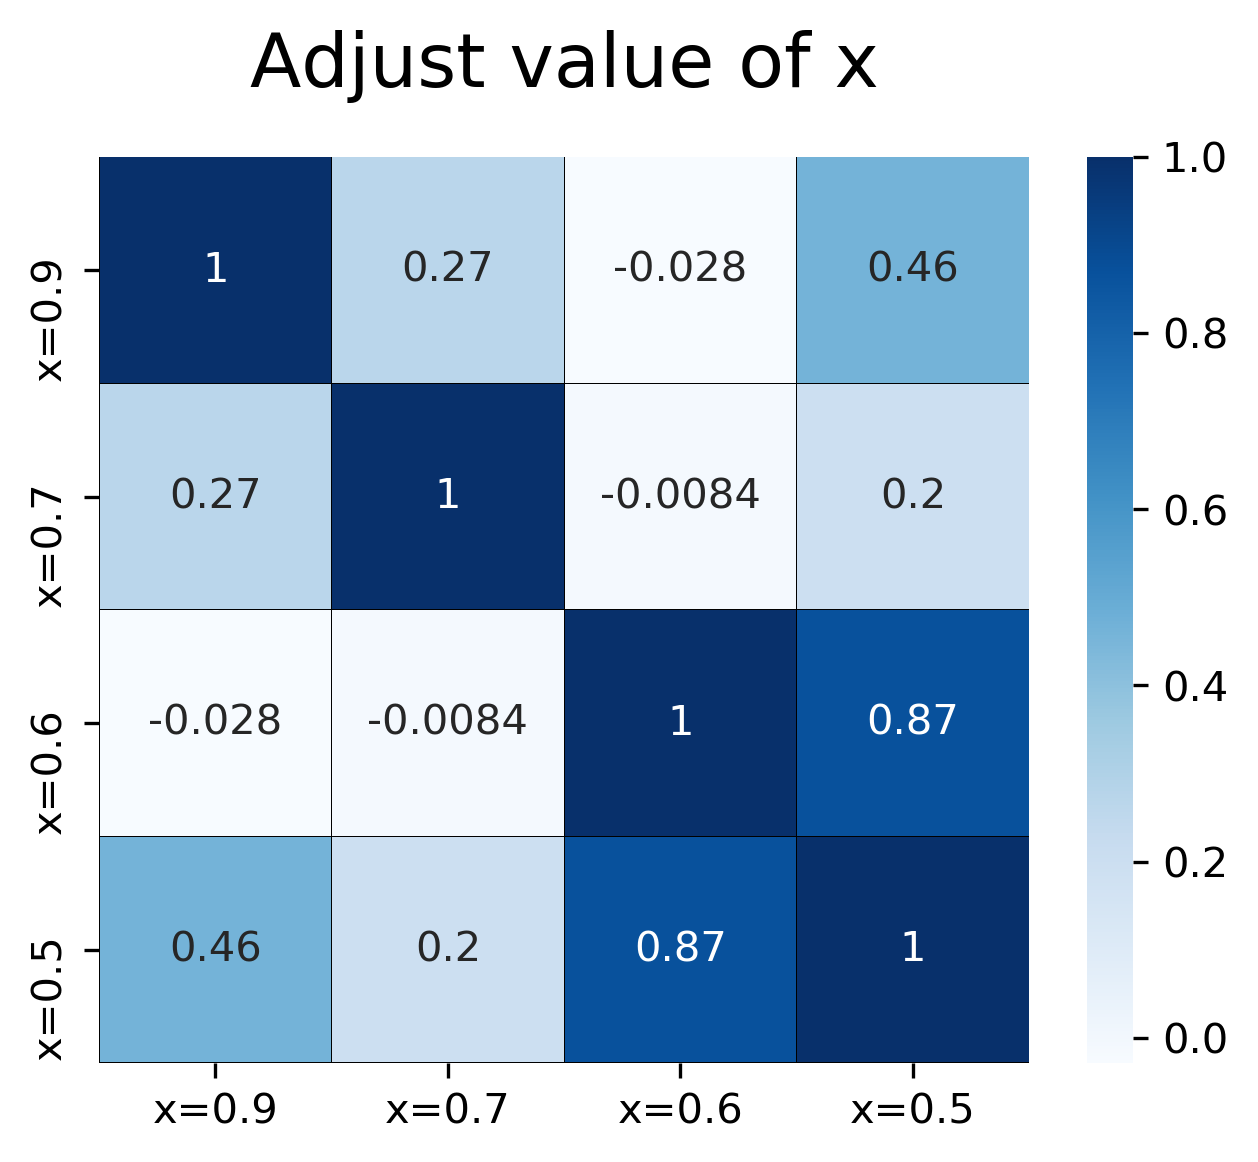

In [6]:
#热力图
# coding : utf-8
# coding : unicode-escape
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot a heatmap for a numpy array:
plt.figure(figsize=(5, 4),dpi=300)
corr = data1.corr()
plt.title('Adjust value of x',y=1.05,size=18)
sns.heatmap(corr,cmap=plt.cm.Blues,linewidths=0.05,linecolor="black",annot=True)
plt.show()

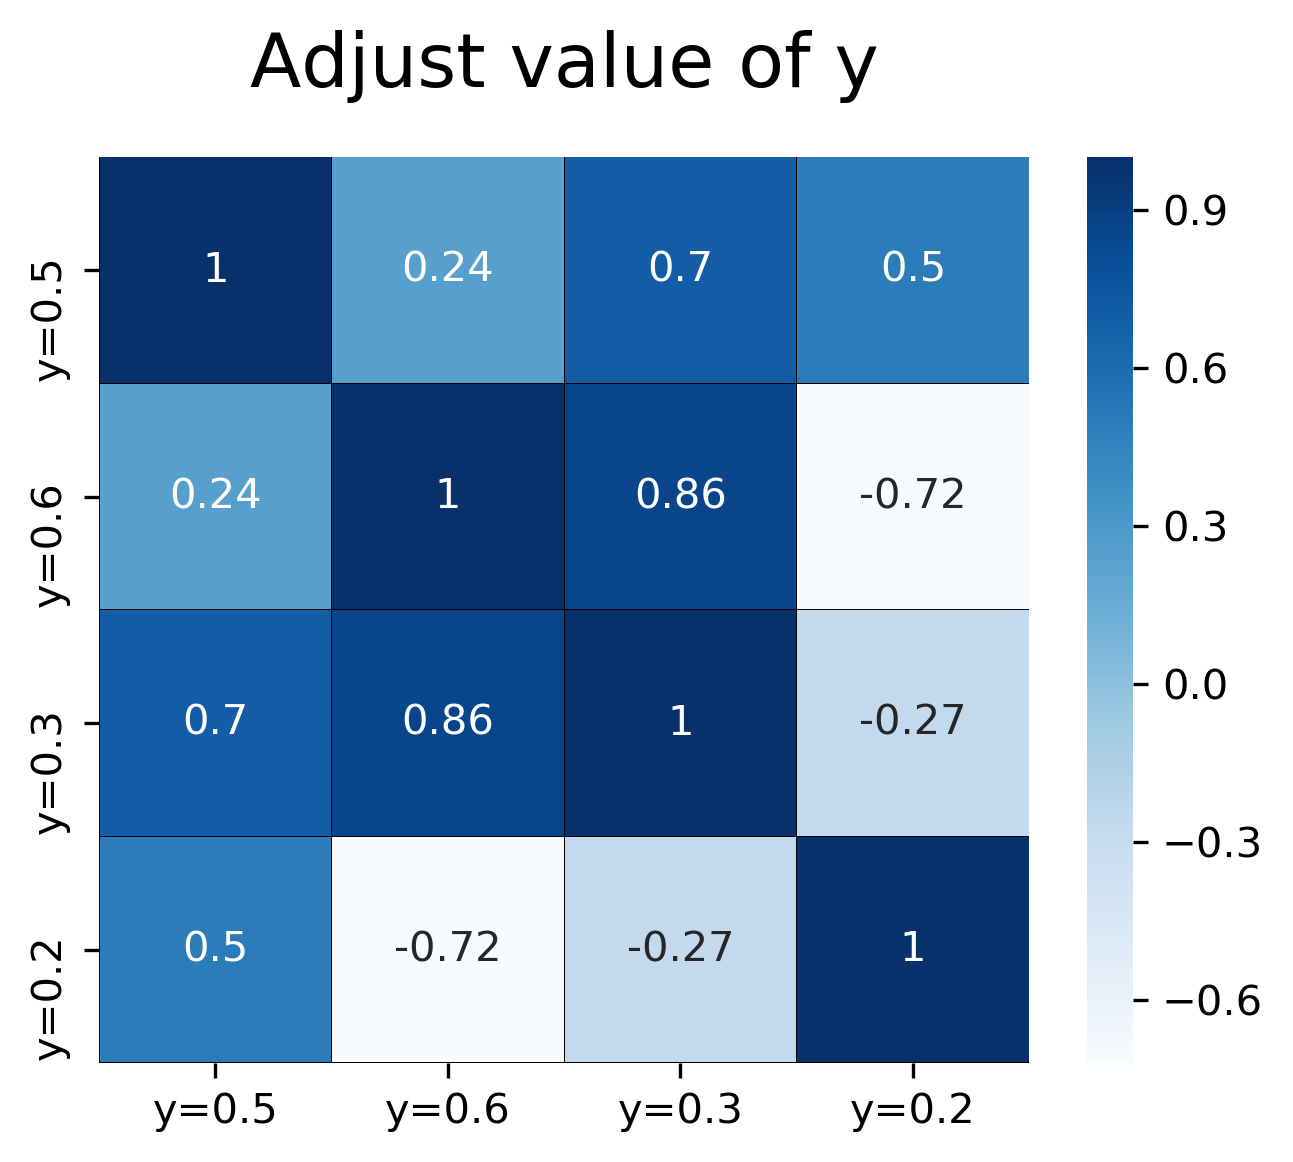

In [7]:
#热力图
# coding : utf-8
# coding : unicode-escape
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot a heatmap for a numpy array:
plt.figure(figsize=(5, 4),dpi=300)
corr = data2.corr()
plt.title('Adjust value of y',y=1.05,size=18)
sns.heatmap(corr,cmap=plt.cm.Blues,linewidths=0.05,linecolor="black",annot=True)
plt.show()